Veri Seti Boyutu: (1000, 6)
Eksik Veri Sayısı: 0

--- Hedef Değişken Dağılımı ---
target
1    715
0    285
Name: count, dtype: int64

--- GÖRSELLEŞTİRME OLUŞTURULUYOR ---


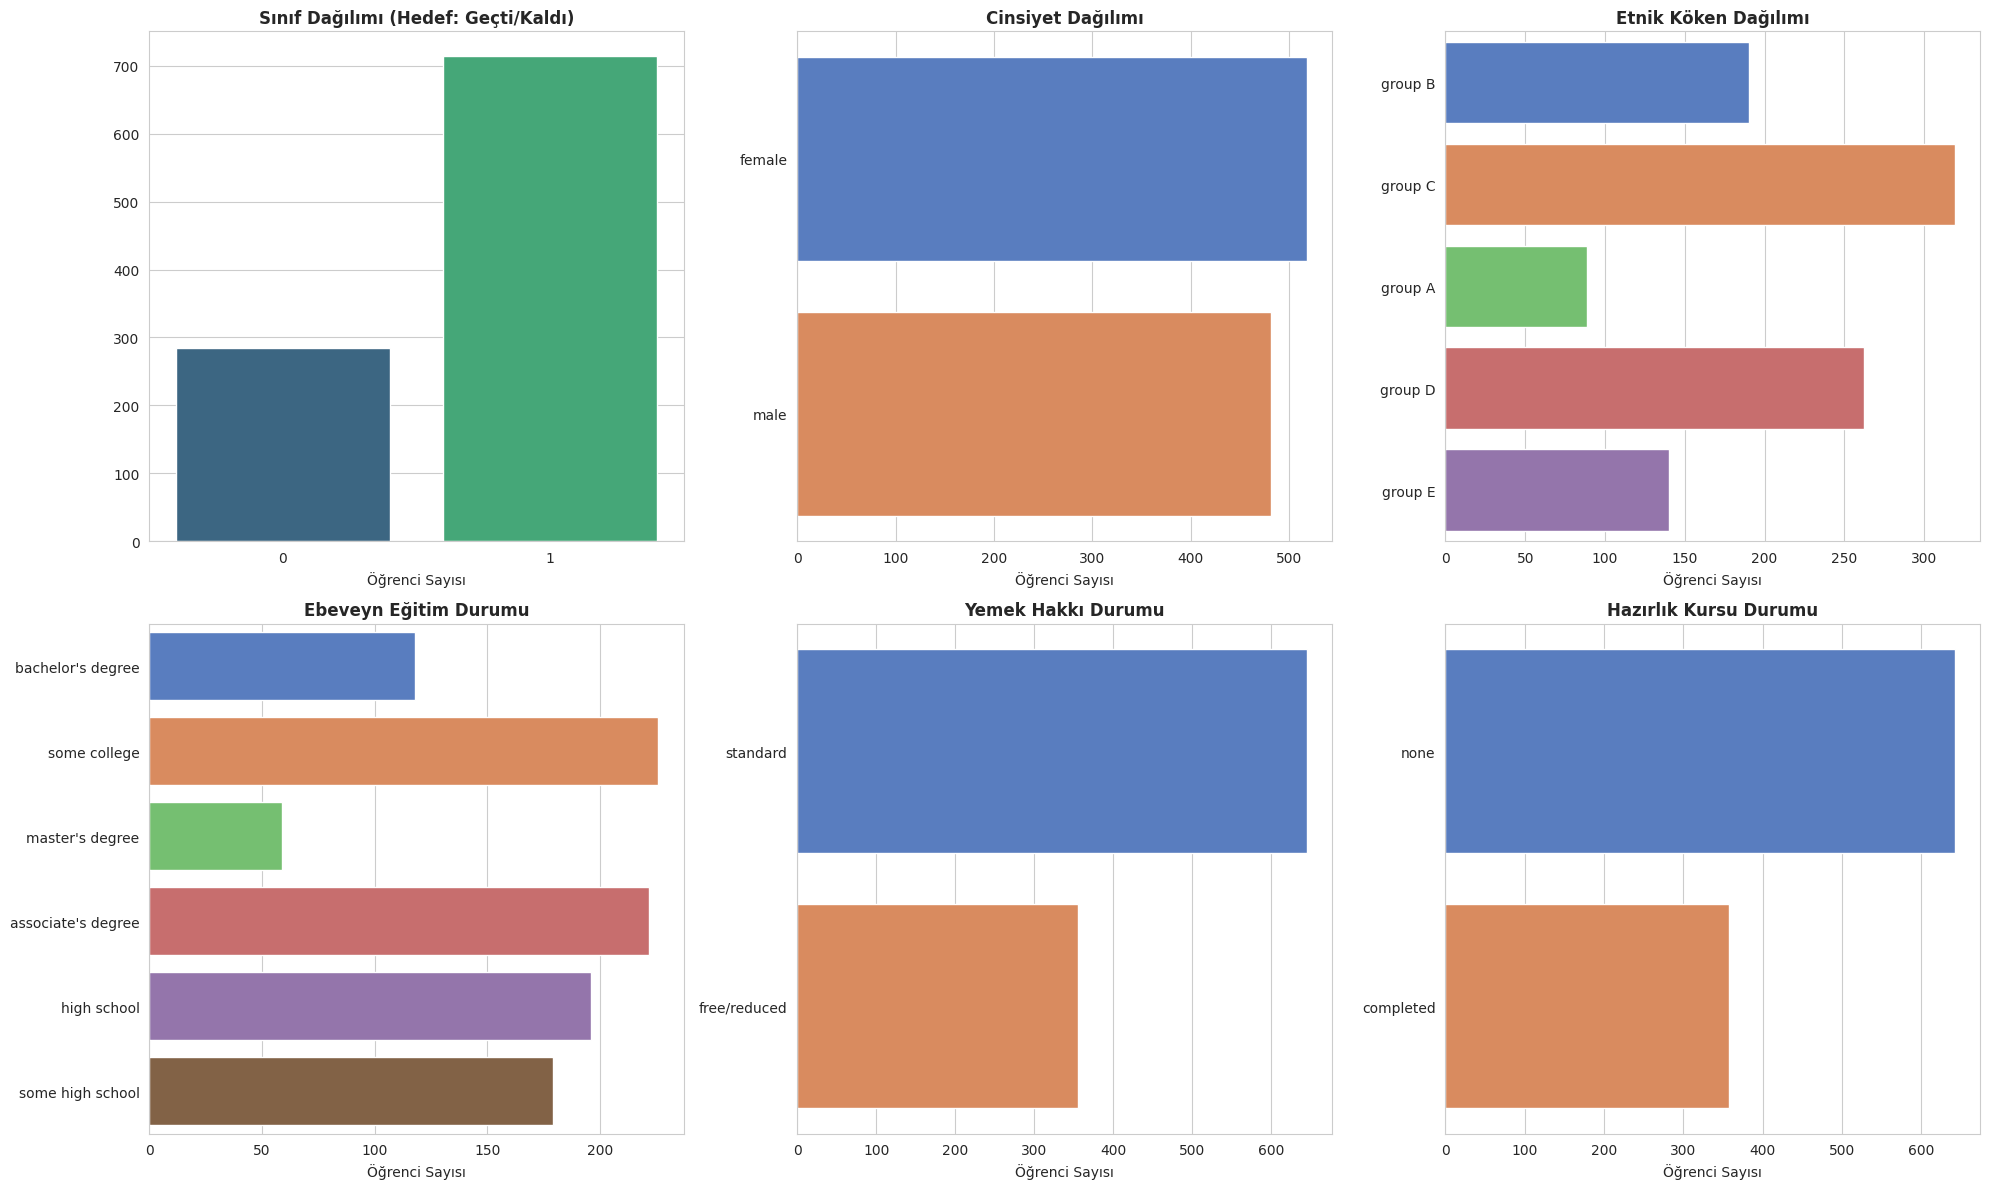


Eğitim Seti: (800, 12)
Test Seti: (100, 12)

================= DEFAULT MODELLER =================

Linear Classifier (LogReg) - Default Sonuçları:
Accuracy  : 0.7000
Precision : 0.7500
Recall    : 0.8750
F1-Score  : 0.8077
ROC-AUC   : 0.6853


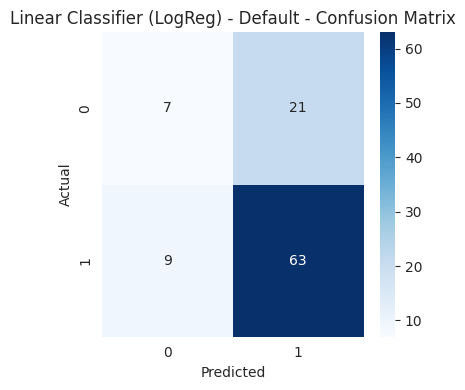

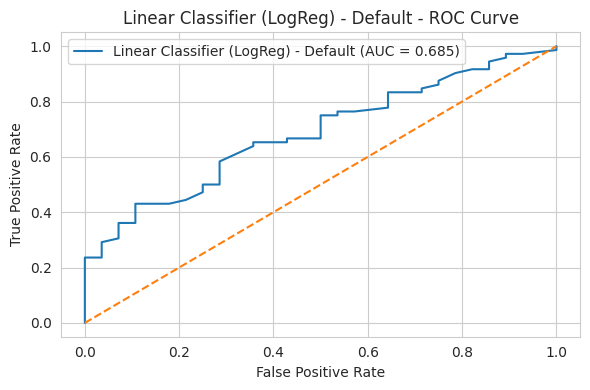

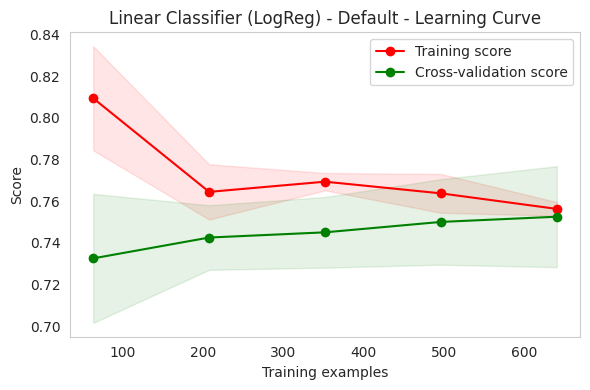


KNN - Default Sonuçları:
Accuracy  : 0.6800
Precision : 0.7500
Recall    : 0.8333
F1-Score  : 0.7895
ROC-AUC   : 0.6178


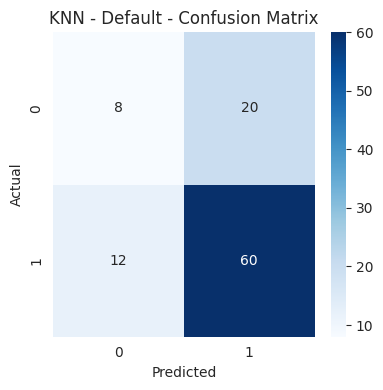

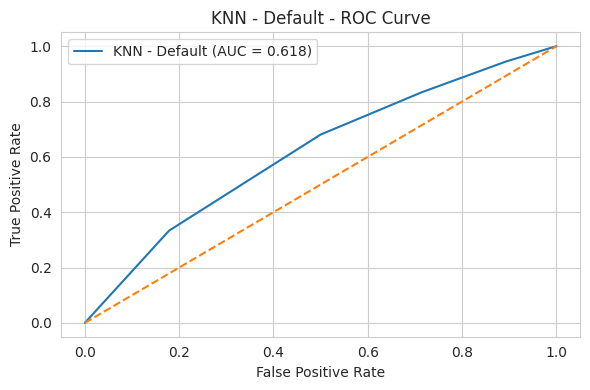

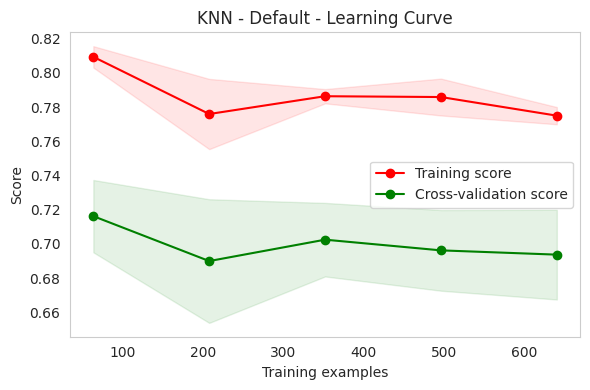


SVM - Default Sonuçları:
Accuracy  : 0.6800
Precision : 0.7326
Recall    : 0.8750
F1-Score  : 0.7975
ROC-AUC   : 0.6173


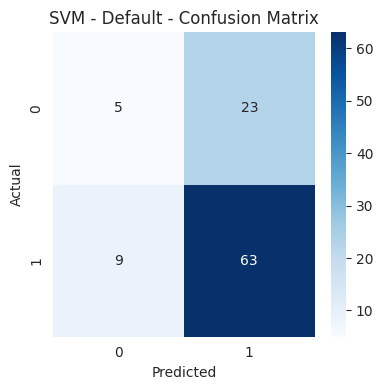

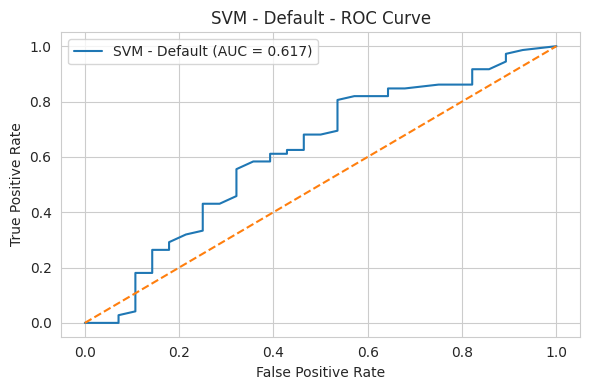

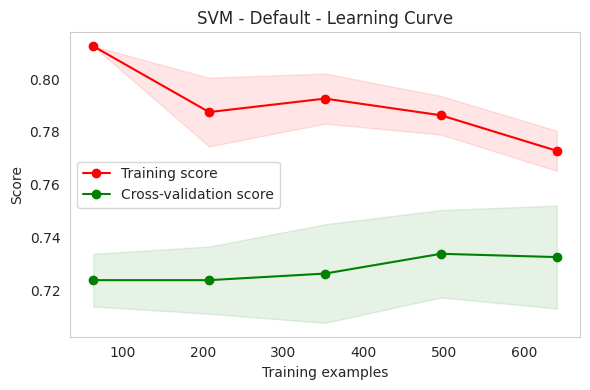


Decision Tree - Default Sonuçları:
Accuracy  : 0.7100
Precision : 0.7654
Recall    : 0.8611
F1-Score  : 0.8105
ROC-AUC   : 0.6069


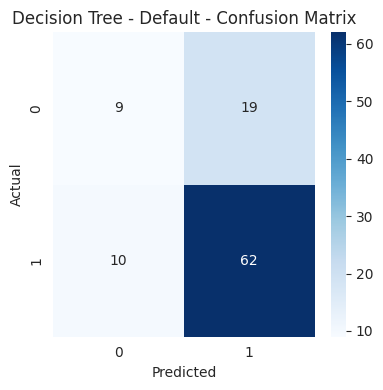

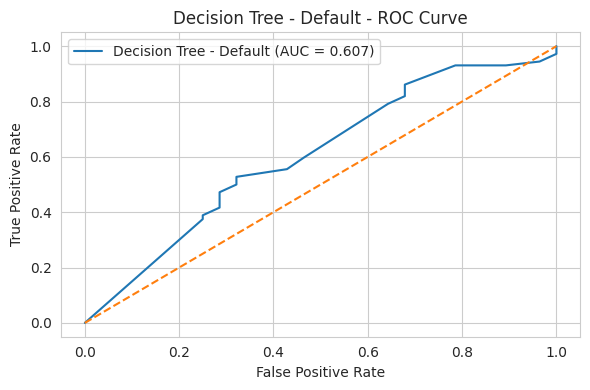

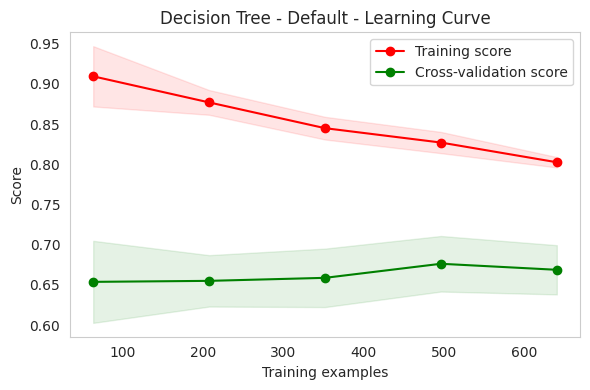


Random Forest - Default Sonuçları:
Accuracy  : 0.7100
Precision : 0.7590
Recall    : 0.8750
F1-Score  : 0.8129
ROC-AUC   : 0.6310


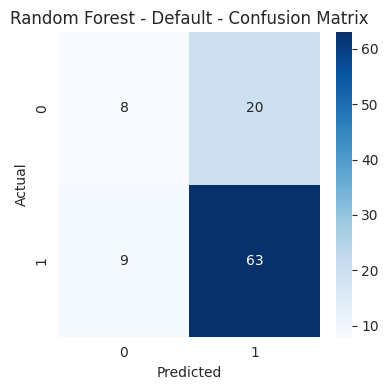

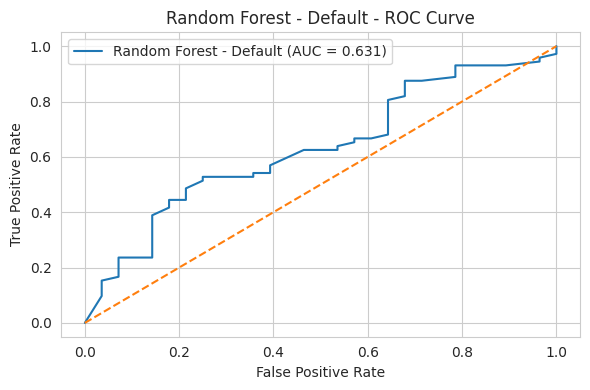

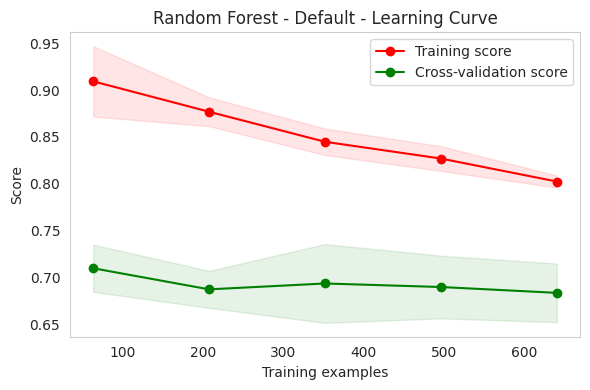


================= HYPERPARAMETER TUNED MODELLER =================

---- Logistic Regression (GridSearchCV ile Tuning) ----
En iyi parametreler: {'C': 0.1, 'solver': 'lbfgs'}

Logistic Regression (Tuned) Sonuçları:
Accuracy  : 0.7000
Precision : 0.7500
Recall    : 0.8750
F1-Score  : 0.8077
ROC-AUC   : 0.6853


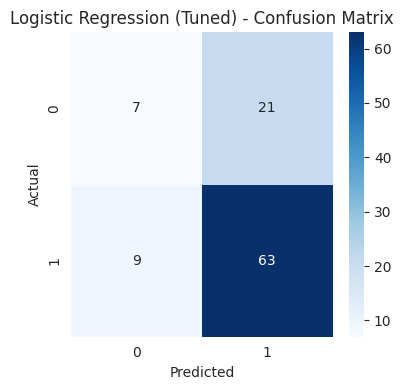

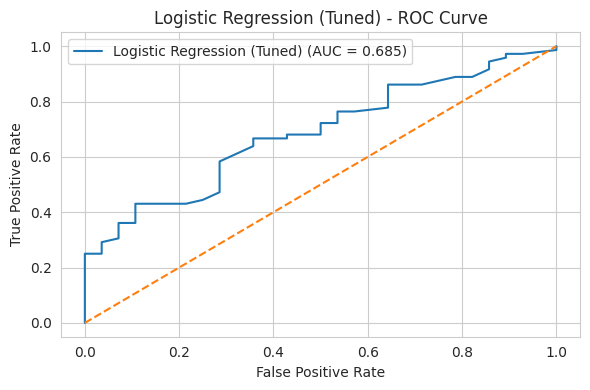

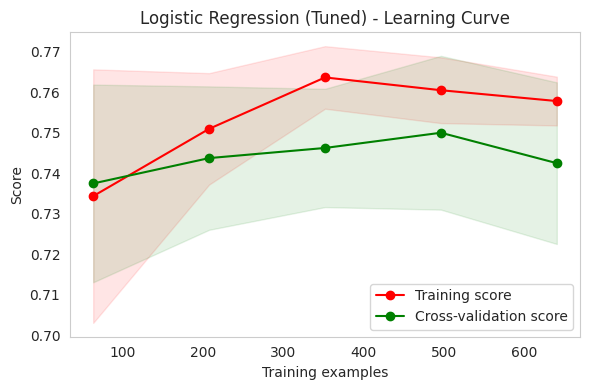


---- KNN (GridSearchCV ile Tuning) ----
En iyi parametreler: {'n_neighbors': 9, 'weights': 'uniform'}

KNN (Tuned) Sonuçları:
Accuracy  : 0.7000
Precision : 0.7386
Recall    : 0.9028
F1-Score  : 0.8125
ROC-AUC   : 0.6312


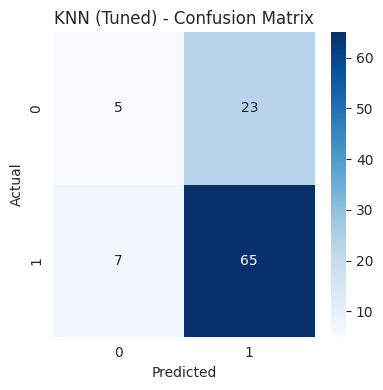

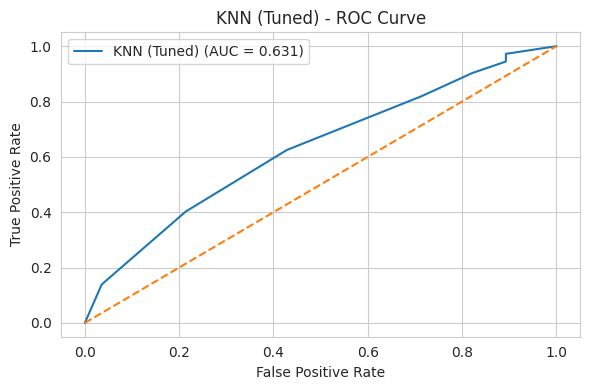

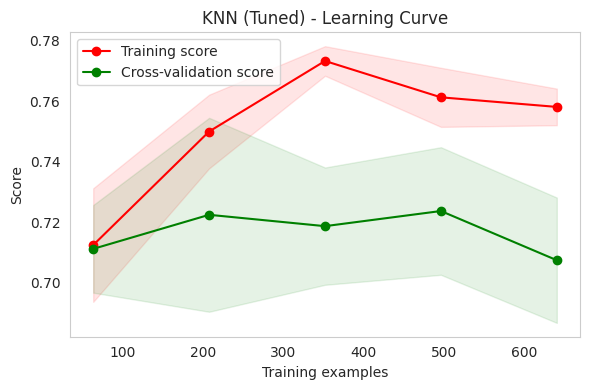


---- SVM (GridSearchCV ile Tuning) ----
En iyi parametreler: {'C': 0.1, 'kernel': 'linear'}

SVM (Tuned) Sonuçları:
Accuracy  : 0.6800
Precision : 0.7326
Recall    : 0.8750
F1-Score  : 0.7975
ROC-AUC   : 0.6649


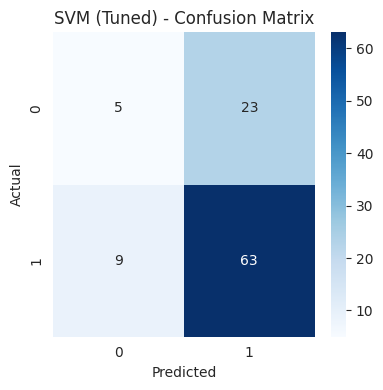

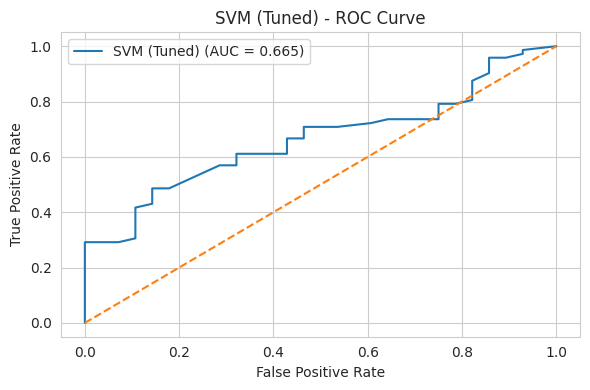

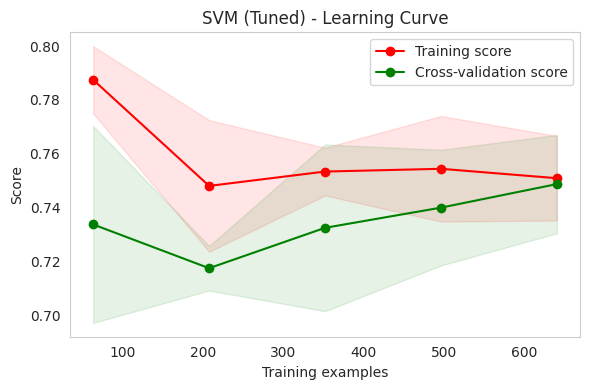


---- Decision Tree (GridSearchCV ile Tuning) ----
En iyi parametreler: {'criterion': 'entropy', 'max_depth': 3}

Decision Tree (Tuned) Sonuçları:
Accuracy  : 0.6300
Precision : 0.7160
Recall    : 0.8056
F1-Score  : 0.7582
ROC-AUC   : 0.5699


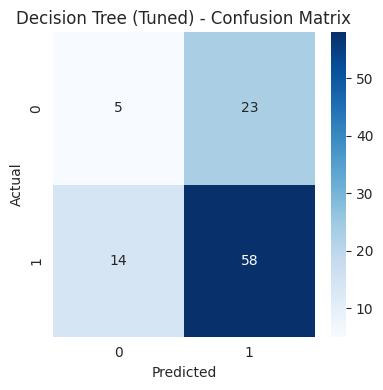

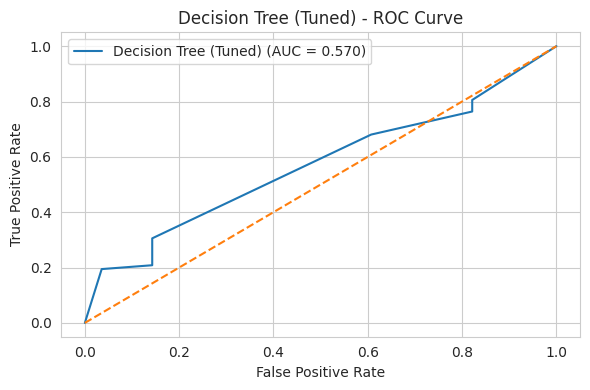

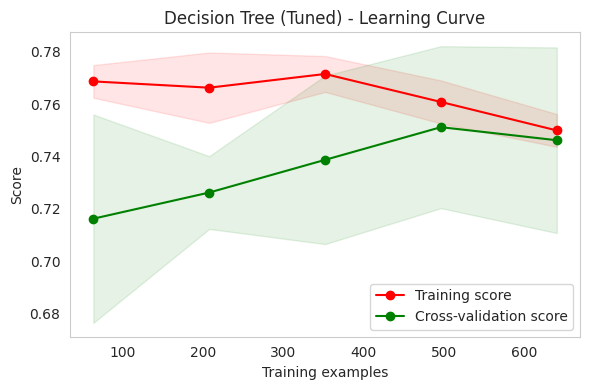


---- Random Forest (GridSearchCV ile Tuning) ----
En iyi parametreler: {'max_depth': 5, 'n_estimators': 100}

Random Forest (Tuned) Sonuçları:
Accuracy  : 0.7100
Precision : 0.7363
Recall    : 0.9306
F1-Score  : 0.8221
ROC-AUC   : 0.6357


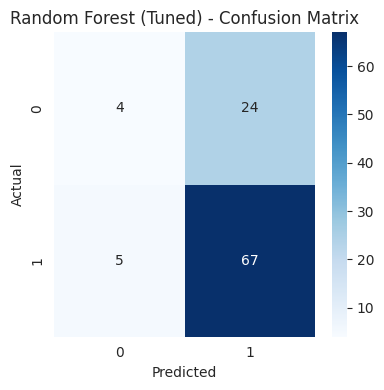

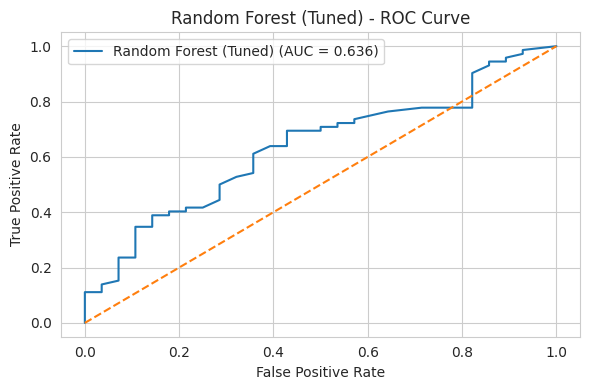

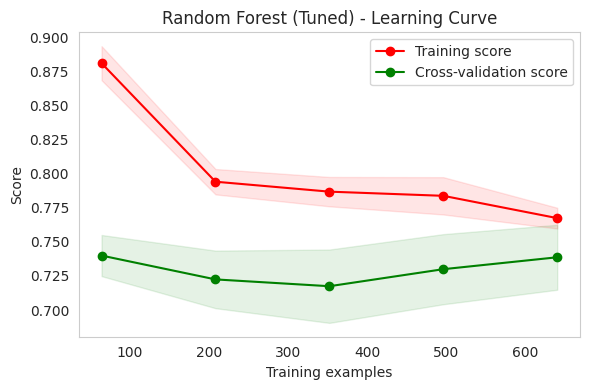


================= STACKING ENSEMBLE =================

Stacking Ensemble (Base: KNN + RF, Meta: LogReg) Sonuçları:
Accuracy  : 0.7100
Precision : 0.7312
Recall    : 0.9444
F1-Score  : 0.8242
ROC-AUC   : 0.6376


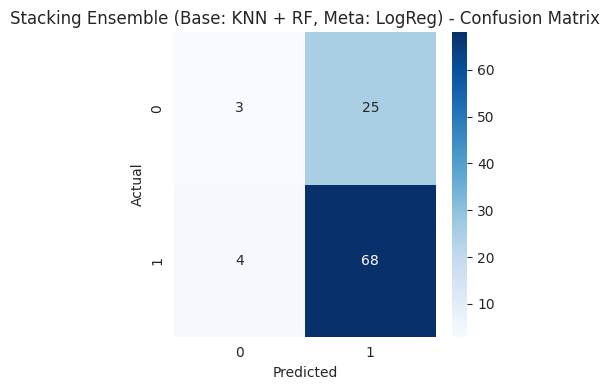

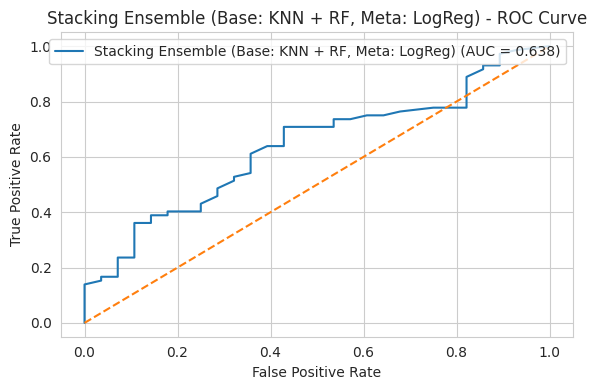

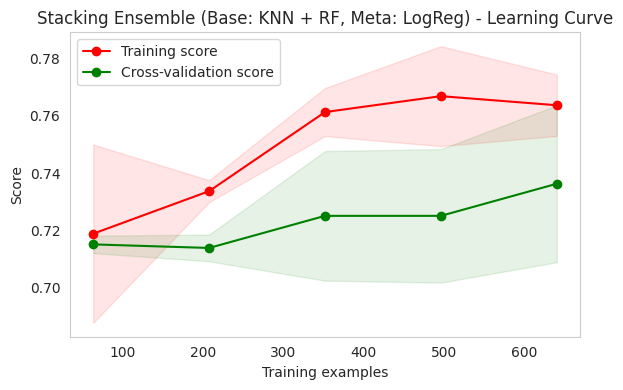


================= VALIDATION SONUÇ TABLOSU =================
                                               Model  Accuracy  Precision  \
5                        Logistic Regression (Tuned)      0.70   0.750000   
0               Linear Classifier (LogReg) - Default      0.70   0.750000   
7                                        SVM (Tuned)      0.68   0.732558   
10  Stacking Ensemble (Base: KNN + RF, Meta: LogReg)      0.71   0.731183   
9                              Random Forest (Tuned)      0.71   0.736264   
6                                        KNN (Tuned)      0.70   0.738636   
4                            Random Forest - Default      0.71   0.759036   
1                                      KNN - Default      0.68   0.750000   
2                                      SVM - Default      0.68   0.732558   
3                            Decision Tree - Default      0.71   0.765432   
8                              Decision Tree (Tuned)      0.63   0.716049   

      Recall 

In [ ]:
# ==========================================
# Prepared By:
# Mehmet Tat - 211015035
# Alper Körkoca -211015020
# Berkan Öksüz - 241015306
# Ertuğrul Selim Bark – 211015028
# ==========================================

# ==========================================
# 1. KÜTÜPHANELER
# ==========================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve # learning_curve eklendi
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV

# Görselleştirme ayarları
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

# ==========================================
# 2. VERİ YÜKLEME VE HEDEF BELİRLEME
# ==========================================
url = "https://raw.githubusercontent.com/Berkanksz/MLProject/refs/heads/main/StudentsPerformance.csv"
df = pd.read_csv(url)

# Hedef Değişken (Target) Oluşturma
# Ortalama >= 60 ise 1 (Geçti), değilse 0 (Kaldı)
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df['target'] = np.where(df['average_score'] >= 60, 1, 0)

# Data Leakage Önlemi: Skorları siliyoruz, model sadece demografik bilgiyle tahmin yapsın.
df_model = df.drop(['math score', 'reading score', 'writing score', 'average_score'], axis=1)

print(f"Veri Seti Boyutu: {df_model.shape}")
print("Eksik Veri Sayısı:", df_model.isnull().sum().sum())
print("\n--- Hedef Değişken Dağılımı ---")
print(df_model['target'].value_counts())

# ==========================================
# 3. GÖRSELLEŞTİRME (EDA)
# ==========================================
print("\n--- GÖRSELLEŞTİRME OLUŞTURULUYOR ---")

# Görselleştirilecek sütunlar
all_cols_to_plot = ['target', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

titles = {
    'target': 'Sınıf Dağılımı (Hedef: Geçti/Kaldı)',
    'gender': 'Cinsiyet Dağılımı',
    'race/ethnicity': 'Etnik Köken Dağılımı',
    'parental level of education': 'Ebeveyn Eğitim Durumu',
    'lunch': 'Yemek Hakkı Durumu',
    'test preparation course': 'Hazırlık Kursu Durumu'
}

# 2 Satır, 3 Sütunluk grafik tuvali
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(all_cols_to_plot):
    sns.countplot(
        x=col if col == 'target' else None,
        y=None if col == 'target' else col,
        data=df_model,
        hue=col, # Renklendirme
        palette='viridis' if col == 'target' else 'muted',
        legend=False,
        ax=axes[i]
    )

    axes[i].set_title(titles.get(col, col), fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Öğrenci Sayısı')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

# ==========================================
# 4. VERİ ÖN İŞLEME (PREPROCESSING)
# ==========================================
# One-Hot Encoding
df_encoded = pd.get_dummies(df_model, drop_first=True)

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Veriyi Bölme: %80 Train, %10 Val, %10 Test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Ölçekleme (Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"\nEğitim Seti: {X_train_scaled.shape}")
print(f"Test Seti: {X_test_scaled.shape}")

# ==========================================
# 5. MODEL KONFİGÜRASYONU
# ==========================================
models_config = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {'max_depth': [3, 5, 10], 'criterion': ['gini', 'entropy']}
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
    }
}

# Sonuçları saklamak için boş liste
results = []

# ==========================================
# 6. YARDIMCI FONKSİYONLAR (DEĞERLENDİRME & LEARNING CURVE)
# ==========================================

def plot_learning_curve_graph(estimator, X, y, title, ylim=None, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Learning Curve çizdirmek için yardımcı fonksiyon.
    """
    plt.figure(figsize=(6, 4))
    plt.title(f"{title} - Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

def evaluate_model(model, X_train, y_train, X_val, y_val, model_name="Model"):
    """
    Modeli eğitir, değerlendirir, Confusion Matrix, ROC ve Learning Curve çizer.
    """

    # Modeli eğit
    model.fit(X_train, y_train)

    # Tahminler
    y_pred = model.predict(X_val)

    # ROC-AUC için olasılık / skor
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_val)[:, 1]
    else:
        scores = model.decision_function(X_val)
        y_proba = (scores - scores.min()) / (scores.max() - scores.min())

    # Metrikler
    acc   = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec   = recall_score(y_val, y_pred)
    f1    = f1_score(y_val, y_pred)
    auc   = roc_auc_score(y_val, y_proba)

    print(f"\n{model_name} Sonuçları:")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-Score  : {f1:.4f}")
    print(f"ROC-AUC   : {auc:.4f}")

    # --- GRAFİKLER ---

    # 1. Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # 2. ROC Eğrisi
    fpr, tpr, _ = roc_curve(y_val, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.3f})")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.title(f"{model_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 3. Learning Curve (YENİ EKLENDİ)
    # Learning curve hesaplaması biraz zaman alabilir, cv=5 ile çalışır.
    plot_learning_curve_graph(model, X_train, y_train, title=model_name)

    return {
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC-AUC": auc
    }

# ==========================================
# 7. BİREYSEL MODELLER - DEFAULT PARAMETRELER
# ==========================================

default_models = {
    "Linear Classifier (LogReg) - Default": LogisticRegression(max_iter=1000, random_state=42),
    "KNN - Default": KNeighborsClassifier(),
    "SVM - Default": SVC(probability=True, random_state=42),
    "Decision Tree - Default": DecisionTreeClassifier(random_state=42),
    "Random Forest - Default": RandomForestClassifier(random_state=42)
}

print("\n================= DEFAULT MODELLER =================")
for name, model in default_models.items():
    res = evaluate_model(
        model,
        X_train_scaled, y_train,
        X_val_scaled, y_val,
        model_name=name
    )
    results.append(res)

# ==========================================
# 8. BİREYSEL MODELLER - HYPERPARAMETER TUNING
# ==========================================

print("\n================= HYPERPARAMETER TUNED MODELLER =================")

best_models = {}

for name, cfg in models_config.items():
    print(f"\n---- {name} (GridSearchCV ile Tuning) ----")

    gs = GridSearchCV(
        estimator=cfg["model"],
        param_grid=cfg["params"],
        cv=3,
        scoring="f1",
        n_jobs=-1
    )

    gs.fit(X_train_scaled, y_train)

    best_model = gs.best_estimator_
    best_models[name] = best_model

    print("En iyi parametreler:", gs.best_params_)

    res = evaluate_model(
        best_model,
        X_train_scaled, y_train,
        X_val_scaled, y_val,
        model_name=name + " (Tuned)"
    )
    results.append(res)

# ==========================================
# 9. STACKING ENSEMBLE MODELİ
# ==========================================

print("\n================= STACKING ENSEMBLE =================")

# Base modeller: örnek olarak KNN ve Random Forest (tuned versiyonlar)
base_estimators = [
    ("knn", best_models["KNN"]),
    ("rf", best_models["Random Forest"])
]

# Meta model: Logistic Regression
meta_model = LogisticRegression(max_iter=1000, random_state=42)

stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_model,
    stack_method="auto",
    n_jobs=-1,
    passthrough=False
)

stack_res = evaluate_model(
    stacking_clf,
    X_train_scaled, y_train,
    X_val_scaled, y_val,
    model_name="Stacking Ensemble (Base: KNN + RF, Meta: LogReg)"
)

results.append(stack_res)
best_models["Stacking Ensemble"] = stacking_clf

# ==========================================
# 10. SONUÇ TABLOSU (VALIDATION SET ÜZERİNDE)
# ==========================================

results_df = pd.DataFrame(results)
print("\n================= VALIDATION SONUÇ TABLOSU =================")
print(results_df.sort_values(by="ROC-AUC", ascending=False))

# ==========================================
# 11. TEST SET ÜZERİNDE FİNAL DEĞERLENDİRME
# ==========================================

print("\n================= TEST SET SONUÇLARI =================")

test_results = []

for name, model in best_models.items():
    # TEST aşamasında da learning curve görmek isterseniz fonksiyon çağrılabilir.
    # Ancak genelde test aşamasında sadece skorlara bakılır.
    # Learning curve burada train seti üzerinden modelin gelişimini gösterir.

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        scores = model.decision_function(X_test_scaled)
        y_proba = (scores - scores.min()) / (scores.max() - scores.min())

    acc   = accuracy_score(y_test, y_pred)
    prec  = precision_score(y_test, y_pred)
    rec   = recall_score(y_test, y_pred)
    f1    = f1_score(y_test, y_pred)
    auc   = roc_auc_score(y_test, y_proba)

    test_results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC-AUC": auc
    })

test_results_df = pd.DataFrame(test_results)
print("\n================= TEST SONUÇ TABLOSU =================")
print(test_results_df.sort_values(by="ROC-AUC", ascending=False))